In [1]:
from __future__ import print_function
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG
from rdkit import rdBase

In [2]:
print(rdBase.rdkitVersion)

2015.03.1


In [3]:
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D

In [7]:
def moldrawsvg(mol, molSize=(400,300), kekulize=True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol( mol.ToBinary() )
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0], molSize[1])
    drawer.DrawMolecule( mc )
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()

    return svg.replace("svg:","")

In [8]:
mol = Chem.MolFromSmiles( "CN1CCN(S(=O)(C2=CC=C(OCC)C(C3=NC4=C(N(C)N=C4CCC)C(N3)=O)=C2)=O)CC1" )

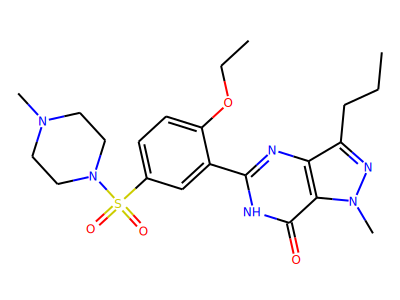

In [9]:
SVG(moldrawsvg(mol))

In [10]:
subs = Chem.MolFromSmarts( "CN1CCNCC1" )

In [17]:
mol = Chem.MolFromSmiles( "CN1CCN(S(=O)(C2=CC=C(OCC)C(C3=NC4=C(N(C)N=C4CCC)C(N3)=O)=C2)=O)CC1" )
rdDepictor.Compute2DCoords(mol)

0

In [18]:
drawer = rdMolDraw2D.MolDraw2DSVG(400,200)

In [19]:
drawer.DrawMolecule(mol)

In [20]:
drawer.FinishDrawing()

In [21]:
svg = drawer.GetDrawingText().replace('svg:','')

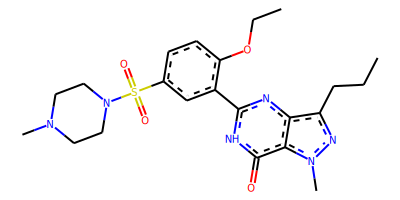

In [22]:
SVG(svg)

In [23]:
drawer = rdMolDraw2D.MolDraw2DSVG(400,200)
drawer.DrawMolecule(mol, highlightAtoms=mol.GetSubstructMatch(subs))
drawer.FinishDrawing()

In [24]:
svg = drawer.GetDrawingText().replace('svg:', '')

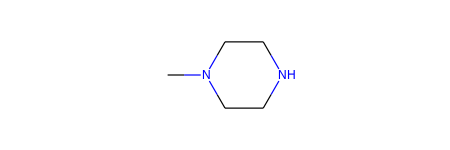

In [26]:
subs

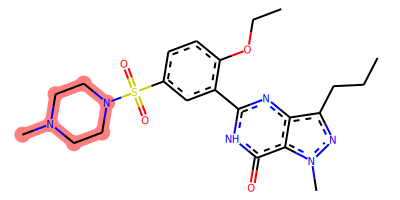

In [25]:
SVG(svg)

In [27]:
drawer.DrawMolecule??